# Summary of GWAS summary statistics

## Overlap between variants

**Variant Distribution in the AD/Aging Universe**
*(Total unique variants = 8,519,817; representing 100%)*

* **AD-only variants:**
  32,724 variants (0.38% of total)

* **Aging-only variants:**
  1,156,287 variants (13.57% of total)

* **AD and Aging overlap (excluding three-way overlap):**
  3,832,093 variants (44.98% of total)

* **AD and Bellenguez overlap (excluding three-way overlap):**
  20,144 variants (0.24% of total)

* **Aging and Bellenguez overlap (excluding three-way overlap):**
  887,776 variants (10.42% of total)

* **Three-way overlap (AD, Aging, and Bellenguez):**
  2,590,793 variants (30.41% of total)

## GVC gene explained by significant variants in GWAS sumstats

* Athough p-value thresholds for defining significant variants are not standardized across studies.
* Under this criteria, only **ABI3 gene** can be explained by the **Aging5** GWAS sumstats.

In [1]:
library(tidyverse)
library(data.table)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
AD1 = fread("/home/rl3328/image_GWAS/new/image_AD1.sorted.gz")
Aging1 = fread("/home/rl3328/image_GWAS/new/image_Aging1.sorted.gz")


In [20]:
AD1 = AD1 |> mutate(variant_ID = paste0(`#CHROM`, ":", POS, ":", A2, ":", A1))
Aging1 = Aging1 |> mutate(variant_ID = paste0(`#CHROM`, ":", POS, ":", A2, ":", A1))

In [50]:
AD_variants = AD1$variant_ID
Aging_variants = Aging1$variant_ID

In [22]:
bellenguez = fread("/mnt/vast/hpc/csg/data_public/GWAS_sumstats/GCST90027158_buildGRCh38.tsv.gz")

In [23]:
head(bellenguez)

variant_id,p_value,chromosome,base_pair_location,effect_allele,other_allele,effect_allele_frequency,odds_ratio,ci_lower,ci_upper,beta,standard_error,n_cases,n_controls,het_isq,het_pvalue,variant_alternate_id
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
rs888953847,0.9626,1,594445,T,C,0.0006,0.985,0.522,1.857,-0.0152,0.3236,20301,21839,0,1.0000,chr1:594445:C:T
rs1040232850,0.267,1,595762,CTG,C,0.9986,0.779,0.502,1.210,-0.2494,0.2247,26798,28624,0,0.5280,chr1:595762:CTG:C
rs1390538076,0.8214,1,630947,A,G,0.0003,1.102,0.473,2.571,0.0975,0.4320,20301,21839,0,1.0000,chr1:630947:G:A
rs1250812823,0.3411,1,646157,A,G,0.0013,0.739,0.396,1.378,-0.3028,0.3180,20301,21839,0,1.0000,chr1:646157:G:A
rs991450070,0.3542,1,726526,C,G,0.0011,1.342,0.721,2.498,0.2938,0.3171,20301,21839,0,1.0000,chr1:726526:G:C
rs151190501,0.6424,1,727233,A,G,0.0191,0.979,0.896,1.070,-0.0210,0.0453,81166,386644,0,0.9467,chr1:727233:G:A


In [ ]:
head(AD1)

chromosome,base_pair_location,other_allele,effect_allele,TEST,N,BETA,SE,Z,p_value,ERRCODE
<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,782207,G,A,ADD,31247,-0.000334046,0.0392128,-0.0085188,0.993203,.
1,784474,CAG,C,ADD,31168,-0.097526600,0.0726473,-1.3424700,0.179454,.
1,788511,C,G,ADD,31509,0.031395200,0.0222987,1.4079400,0.159160,.
1,788915,TGGAAC,T,ADD,30942,0.034595300,0.0537308,0.6438630,0.519669,.
1,801309,T,C,ADD,31104,-0.048063700,0.0579955,-0.8287490,0.407253,.
1,817341,G,A,ADD,31929,0.003228840,0.0110722,0.2916160,0.770582,.


In [ ]:
dim(AD1)
dim(bellenguez)


[1] 6475754      14

[1] 21101114       17

In [ ]:
bellenguez = bellenguez |> mutate(variant_ID = paste0(chromosome, ":", base_pair_location, ":", effect_allele, ":", other_allele))
bellenguez_variants = bellenguez$variant_ID

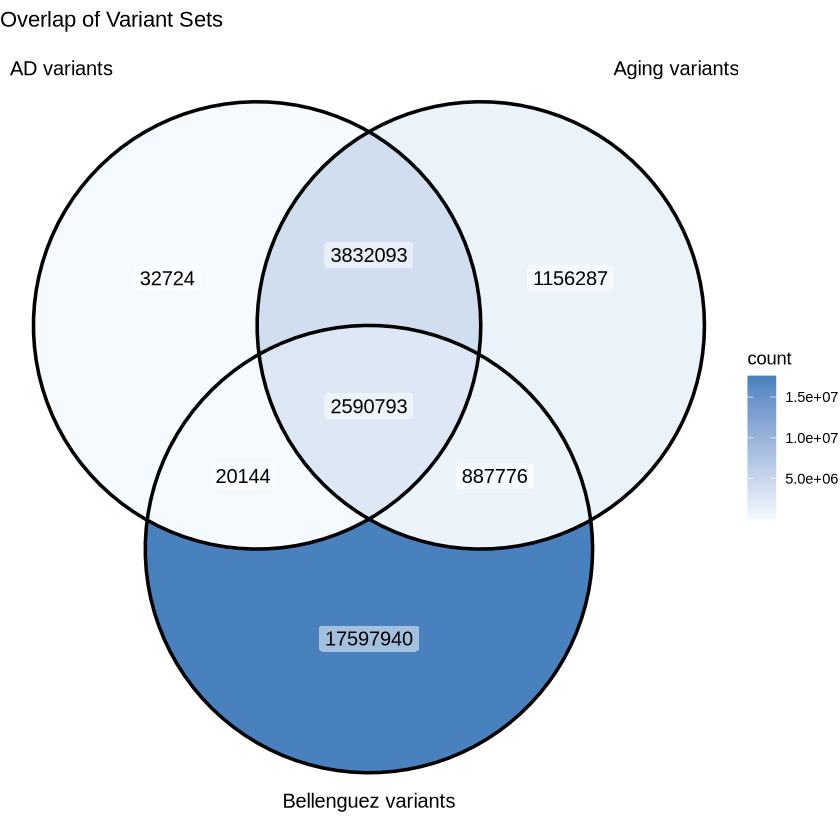

In [63]:
library(ggVennDiagram)

# Assume you have your three lists of variants
# AD_variants - list of AD variants
# Aging_variants - list of aging variants
# bellenguez_variants - list of Bellenguez variants

# Create a list to hold your sets
venn_list <- list(
  "AD variants" = AD_variants,
  "Aging variants" = Aging_variants,
  "Bellenguez variants" = bellenguez_variants
)

# Create and customize the Venn diagram
venn_plot <- ggVennDiagram(
  venn_list,
  category.names = names(venn_list),
  label = "count",
  edge_size = 1
) +
  scale_fill_gradient(low = "#F4FAFE", high = "#4981BF") +
  theme(legend.position = "right") +
  labs(title = "Overlap of Variant Sets")

# Save the plot as a PNG file with high resolution
ggsave(
  filename = "variant_overlap.png", 
  plot = venn_plot, 
  width = 8,       # Width in inches
  height = 6,      # Height in inches
  dpi = 300,       # Resolution (dots per inch)
  bg = "white"     # White background
)
print(venn_plot)

### Overlap between GVC gene list and significant image GWAS variants
* variants with P value < 5e-8 are defined as significant 
* No significant variants in image GWAS sumstats fall within the cis_window([TSS-500, TES+500]) of the GVC genes

In [3]:

AD2 = fread("/home/rl3328/image_GWAS/new/image_AD2.sorted.gz")
Aging2 = fread("/home/rl3328/image_GWAS/new/image_Aging2.sorted.gz")
Aging3 = fread("/home/rl3328/image_GWAS/new/image_Aging3.sorted.gz")
Aging4 = fread("/home/rl3328/image_GWAS/new/image_Aging4.sorted.gz")
Aging5 = fread("/home/rl3328/image_GWAS/new/image_Aging5.sorted.gz")

In [4]:
combined_df <- bind_rows(
  "AD1" = AD1, 
  "AD2" = AD2, 
  "Aging1" = Aging1, 
  "Aging2" = Aging2, 
  "Aging3" = Aging3,
  "Aging4" = Aging4,
  "Aging5" = Aging5,
  .id = "source"
)

In [5]:
sig_gwas_var = combined_df |> 
  filter(P < 5e-8) 

In [10]:
head(sig_gwas_var)
dim(sig_gwas_var)

source,#CHROM,POS,A2,A1,TEST,N,BETA,SE,Z,P,ERRCODE
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AD1,1,50359773,A,C,ADD,31617,0.0505426,0.00880806,5.73822,9.65503e-09,.
AD1,3,47276959,C,A,ADD,31809,0.0454886,0.00808842,5.62392,1.88238e-08,.
AD1,3,47281291,G,A,ADD,31925,0.0455878,0.00806943,5.64944,1.62342e-08,.
AD1,3,47281510,T,G,ADD,31925,0.0458442,0.00806599,5.68364,1.33007e-08,.
AD1,3,47284808,G,A,ADD,31924,0.0456699,0.00806928,5.65972,1.52915e-08,.
AD1,3,47289646,C,T,ADD,31913,0.0454824,0.00807007,5.63594,1.75573e-08,.


[1] 6564   12

In [10]:
filtered_gene_list = fread("/home/rl3328/image_QTL/colocboost/image7+ad6/GVC_gene_list.gene_list.tsv")
head(filtered_gene_list)
dim(filtered_gene_list)

#chr,start,end,gene_id,strand,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr1,207496146,207641764,ENSG00000203710,+,CR1
chr1,226870183,226927725,ENSG00000143801,+,PSEN2
chr1,226870183,226987544,ENSG00000288674,+,AL391628.1
chr2,127048026,127107287,ENSG00000136717,-,BIN1
chr5,140558267,140564780,ENSG00000113108,-,APBB3
chr6,41158505,41163185,ENSG00000095970,-,TREM2


[1] 21  6

In [11]:
# Function to check if a variant position is within a gene's cis window
is_variant_in_cis_window <- function(gene_chr, gene_start, gene_end, variant_df, window_size = 500) {
  # Extract chromosome and position from the variant
  # Assuming variant_df is a single row data frame
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  
  # Check if the variant's chromosome matches the gene's chromosome 
  # and if the position is within the cis window
  return(gene_chr == paste0("chr", variant_df$`#CHROM`) && 
         variant_df$POS >= cis_start && 
         variant_df$POS <= cis_end)
}

# Find matching variants within cis window for each gene
find_cis_window_variants <- function(gene_chr, gene_start, gene_end, variants_df, window_size = 500) {
  matching_variants <- character(0)
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  
  # Assuming variants_df is a data frame with multiple rows
  for(i in 1:nrow(variants_df)) {
    variant_row <- variants_df[i,]
    if(is_variant_in_cis_window(gene_chr, gene_start, gene_end, variant_row, window_size)) {
      # Add some identifier for this variant (e.g., rsID or chromosome_position)
      # Adjust this based on what identifier you want to use
      variant_id <- paste0(variant_row$`#CHROM`, ":", variant_row$POS,":", variant_row$A2, ":", variant_row$A1)
      matching_variants <- c(matching_variants, variant_id)
    }
  }
  
  if(length(matching_variants) > 0) {
    return(list(
      is_in_cis_window = TRUE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      contained_variants = paste(matching_variants, collapse = ";")
    ))
  } else {
    return(list(
      is_in_cis_window = FALSE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      contained_variants = NA
    ))
  }
}

# Define window size as a parameter for easier modification
window_size <- 500000

# Initialize the new columns
filtered_gene_list$is_in_cis_window <- FALSE
filtered_gene_list$cis_window_lower_bound <- NA
filtered_gene_list$cis_window_upper_bound <- NA
filtered_gene_list$contained_variants <- NA

# Loop through each row to find cis window variants
for (i in 1:nrow(filtered_gene_list)) {
  result <- find_cis_window_variants(
    filtered_gene_list$`#chr`[i],
    filtered_gene_list$start[i],
    filtered_gene_list$end[i],
    sig_gwas_var,  # This is the data frame of variants
    window_size
  )
  filtered_gene_list$is_in_cis_window[i] <- result$is_in_cis_window
  filtered_gene_list$cis_window_lower_bound[i] <- result$cis_window_lower_bound
  filtered_gene_list$cis_window_upper_bound[i] <- result$cis_window_upper_bound
  filtered_gene_list$contained_variants[i] <- result$contained_variants
}

# View the result
print(filtered_gene_list)

      #chr     start       end         gene_id strand  gene_name
    <char>     <int>     <int>          <char> <char>     <char>
 1:   chr1 207496146 207641764 ENSG00000203710      +        CR1
 2:   chr1 226870183 226927725 ENSG00000143801      +      PSEN2
 3:   chr1 226870183 226987544 ENSG00000288674      + AL391628.1
 4:   chr2 127048026 127107287 ENSG00000136717      -       BIN1
 5:   chr5 140558267 140564780 ENSG00000113108      -      APBB3
 6:   chr6  41158505  41163185 ENSG00000095970      -      TREM2
 7:   chr7 100367529 100400095 ENSG00000085514      +      PILRA
 8:   chr7 143390288 143408855 ENSG00000146904      -      EPHA1
 9:  chr11  47354859  47378546 ENSG00000066336      -       SPI1
10:  chr11  60172013  60184665 ENSG00000110077      -     MS4A6A
11:  chr11  85957174  86069881 ENSG00000073921      -     PICALM
12:  chr11 121452313 121633762 ENSG00000137642      +      SORL1
13:  chr10 113679161 113730906 ENSG00000165806      +      CASP7
14:  chr14  73136417  732

In [17]:
variants = filtered_gene_list |> 
  filter(is_in_cis_window == TRUE) |> 
  pull(contained_variants) |> 
  str_split(";") |> 
  unlist() |> 
  unique()






[1] "17:48767335:T:C" "17:48767634:C:T" "17:48777744:A:T" "17:48780125:C:A"
 [5] "17:48892897:C:T" "17:48900991:C:T" "17:48905018:G:A" "17:48906458:G:A"
 [9] "17:48925181:G:A" "17:48935189:G:C" "17:48963251:G:A" "17:48964800:C:A"
[13] "17:48968500:G:A"

In [16]:
combined_df = combined_df |> 
  mutate(variant_ID = paste0(`#CHROM`, ":", POS, ":", A2, ":", A1))

In [19]:
combined_df |> filter(variant_ID %in% variants & P < 5e-8)

source,#CHROM,POS,A2,A1,TEST,N,BETA,SE,Z,P,ERRCODE,variant_ID
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Aging5,17,48767335,T,C,ADD,32657,-0.0454927,0.00814636,-5.58442,2.36346e-08,.,17:48767335:T:C
Aging5,17,48767634,C,T,ADD,32694,-0.0469005,0.00830042,-5.65037,1.61430e-08,.,17:48767634:C:T
Aging5,17,48777744,A,T,ADD,32749,-0.0459204,0.00817785,-5.61522,1.97906e-08,.,17:48777744:A:T
Aging5,17,48780125,C,A,ADD,32816,-0.0449831,0.00816123,-5.51180,3.57858e-08,.,17:48780125:C:A
Aging5,17,48892897,C,T,ADD,32829,-0.0464216,0.00843165,-5.50564,3.70570e-08,.,17:48892897:C:T
Aging5,17,48900991,C,T,ADD,32829,-0.0464010,0.00843458,-5.50128,3.79846e-08,.,17:48900991:C:T
Aging5,17,48905018,G,A,ADD,32820,-0.0465990,0.00843625,-5.52366,3.34530e-08,.,17:48905018:G:A
Aging5,17,48906458,G,A,ADD,32820,-0.0465990,0.00843625,-5.52366,3.34530e-08,.,17:48906458:G:A
Aging5,17,48925181,G,A,ADD,32804,-0.0480542,0.00847311,-5.67137,1.42851e-08,.,17:48925181:G:A
